In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import scipy.stats as stats
from pandas.plotting import scatter_matrix

In [56]:
fn = 'CattedEilers2'

In [44]:
def metropolis_hastings(p,start, iter=5000):
    '''
    Adapted from: https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/
    '''
    x = start
    samples = np.zeros((iter))

    for i in range(iter):
        x_star = x + np.random.normal()
        if np.random.rand() < (p(x_star) / p(x)):
            x = x_star
        samples[i] = x

    return samples

In [57]:
# res = np.loadtxt('oortparams11271200.dat',skiprows=2,dtype= str)
# (Log Likelihood, [A,B,C,K,u_0,v_0,w_0,sig_ul,sig_ub])
# In radial case: (Log Likelihood, [A,B,C,K,u_0,v_0,w_0,sig_ul,sig_ub]), bin, n

rad = True #Set if the input file is from the general script or the radial script

numlines = np.inf if rad == True else 10000 #--> Number of points I'm plotting--> Way too many to deal with otherwise

#Parsing the data file

while True:
    data = ''
    try:
        l = []
        with open(fn+'.dat', 'r') as myfile:
            for i, line in enumerate(myfile):
                if i < numlines:
                    data += line.replace(',',' ').replace('>',' ').replace(']',' ').replace('[',' ')
                    for t in data.split():
                        try:
                            l.append(float(t))
                        except ValueError:
                            pass
                    data = ''
                else:
                    break
#         l = []
#         for t in data.split():
#             try:
#                 l.append(float(t))
#             except ValueError:
#                 pass
        nums = np.array(l)
        if(rad):
            gnums = np.reshape(nums,(len(nums)//12,12))
        else:
            gnums = np.reshape(nums,(len(nums)//10,10))
        break
    except ValueError:
        numlines += 1
        continue
    #data=myfile.read().replace(',',' ').replace('>',' ').replace(']',' ').replace('[',' ')

In [19]:
# l = []
# for t in data.split():
#     try:
#         l.append(float(t))
#     except ValueError:
#         pass

In [20]:
# nums = np.array(l)

In [21]:
# gnums = np.reshape(nums,(len(nums)//10,10))

In [22]:
# plt.figure(figsize=(11,11))
# plt.scatter(gnums[:,2],gnums[:,3],s=1,c=gnums[:,0]/gnums[0,0],cmap=cm.viridis,norm = mpl.colors.Normalize(),alpha=0.3);
# plt.colorbar();
# plt.xlabel('A');
# plt.ylabel('B');

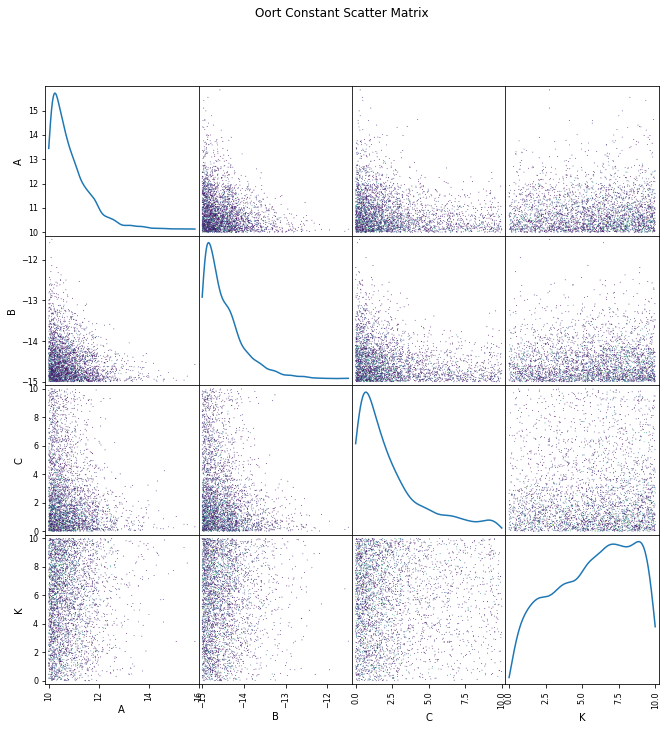

In [58]:
if rad == False:
    df = pd.DataFrame(gnums[:,1:5], columns = ['A', 'B', 'C', 'K'])
    scatter_matrix(df, alpha = 1, figsize = (11, 11), diagonal = 'kde',c=gnums[:,0]/gnums[0,0],cmap=cm.viridis,norm = mpl.colors.Normalize(),s=3);
    plt.suptitle('Oort Constant Scatter Matrix');
    plt.savefig(fn+'.png',dpi=300)

# Create KDE, sample from it, create confidence intervals

In [59]:
if rad == False:
    
    Apdf = stats.kde.gaussian_kde(gnums[:,1])
    Bpdf = stats.kde.gaussian_kde(gnums[:,2])
    Cpdf = stats.kde.gaussian_kde(gnums[:,3])
    Dpdf = stats.kde.gaussian_kde(gnums[:,4])
    
    A_stats = stats.bayes_mvs(metropolis_hastings(Apdf,10.5),alpha= 0.95)
    B_stats = stats.bayes_mvs(metropolis_hastings(Bpdf,-14.5),alpha= 0.95)
    C_stats = stats.bayes_mvs(metropolis_hastings(Cpdf,2),alpha= 0.95)
    K_stats = stats.bayes_mvs(metropolis_hastings(Dpdf,5),alpha= 0.95)
    
    print(A_stats)
    print(B_stats)
    print(C_stats)
    print(K_stats)
    
    filename = fn+'_stats.dat'
    
    with open(filename,'w') as f:
        f.write('A: '+str(A_stats)+'\n')
        f.write('B: '+str(B_stats)+'\n')
        f.write('C: '+str(C_stats)+'\n')
        f.write('K: '+str(K_stats)+'\n')

(Mean(statistic=10.899613843218734, minmax=(10.877362155745967, 10.921865530691502)), Variance(statistic=0.6444655773977761, minmax=(0.619202990978267, 0.6697281638172852)), Std_dev(statistic=0.8027861342834567, minmax=(0.7870518151786196, 0.8185204533882938)))
(Mean(statistic=-14.476823626104906, minmax=(-14.490014673767485, -14.463632578442327)), Variance(statistic=0.22648132722271494, minmax=(0.2176034223321679, 0.23535923211326198)), Std_dev(statistic=0.4759005434150238, minmax=(0.46657306416185895, 0.48522802266818865)))
(Mean(statistic=2.793654357599222, minmax=(2.7180154311660507, 2.869293284032393)), Variance(statistic=7.446711599694902, minmax=(7.154805868921729, 7.738617330468076)), Std_dev(statistic=2.728866357976312, minmax=(2.6753815601737467, 2.7823511557788776)))
(Mean(statistic=5.655701184461233, minmax=(5.578573480801287, 5.732828888121178)), Variance(statistic=7.7427390862692, minmax=(7.439229291253636, 8.046248881284765)), Std_dev(statistic=2.782577777218312, minmax=

# Radial bins plotting below

In [24]:
modes = []
for i in range(0,2200,200):
    want = np.where(gnums[:,-2]==i)
    
    if(len(want[0]) == 0):
        continue
        
    Apdf = stats.kde.gaussian_kde(gnums[want,1])
    Bpdf = stats.kde.gaussian_kde(gnums[want,2])
    Cpdf = stats.kde.gaussian_kde(gnums[want,3])
    Dpdf = stats.kde.gaussian_kde(gnums[want,4])
    
#     dom = np.linspace(-20,20,2000)
#     A = Apdf(dom)
#     B = Bpdf(dom)
#     C = Cpdf(dom)
#     D = Dpdf(dom)
    
    A_stats = stats.bayes_mvs(metropolis_hastings(Apdf,10.5),alpha= 0.95)
    B_stats = stats.bayes_mvs(metropolis_hastings(Bpdf,-14.5),alpha= 0.95)
    C_stats = stats.bayes_mvs(metropolis_hastings(Cpdf,2),alpha= 0.95)
    K_stats = stats.bayes_mvs(metropolis_hastings(Dpdf,5),alpha= 0.95)
    
#     A_stats = stats.bayes_mvs(gnums[want,1],alpha= 0.95)
#     B_stats = stats.bayes_mvs(gnums[want,2],alpha = 0.95)
#     C_stats = stats.bayes_mvs(gnums[want,3],alpha = 0.95)
#     K_stats = stats.bayes_mvs(gnums[want,4],alpha = 0.95)
    
#     A_mode = gnums[np.argsort(A)[-1],1]
#     B_mode = gnums[np.argsort(B)[-1],2]
#     C_mode = gnums[np.argsort(C)[-1],3]
#     D_mode = gnums[np.argsort(D)[-1],4]
    
#     modes.append((i,A_mode,B_mode,C_mode,D_mode,A_stats,B_stats,C_stats,K_stats))
    modes.append((i,A_stats,B_stats,C_stats,K_stats))

In [25]:
n = []
for i in range(0,2040,40):
    want = np.where(gnums[:,-2]==i)
    if(len(want[0]) == 0):
        continue
    n.append(gnums[want][0,-2:])
r = np.array([i[0] for i in modes])

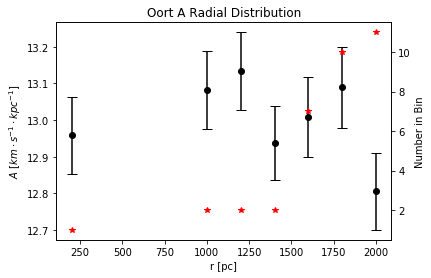

In [26]:
fig, ax1 = plt.subplots()

ax1.errorbar(r, np.array([i[1][0][0] for i in modes]),yerr=np.array([abs(i[1][0][0]-i[1][0][1]) for i in modes]).T, color='k',fmt='o', capsize=5)
ax1.set_xlabel('r [pc]')

ax1.set_ylabel('$A \ [km \cdot s^{-1} \cdot kpc^{-1}]$', color='k')
ax1.tick_params('y', colors='k')
ax1.ticklabel_format(useOffset=False)

ax2 = ax1.twinx()
ax2.plot(r, np.array([i[1] for i in n]), 'r*')
ax2.set_ylabel('Number in Bin', color='k')
ax2.tick_params('y', colors='k')

plt.title('Oort A Radial Distribution')
plt.savefig(fn+'_radial_A.png',dpi=300);

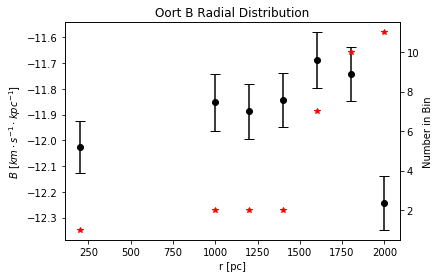

In [27]:
fig, ax1 = plt.subplots()

ax1.errorbar(r, np.array([i[2][0][0] for i in modes]),yerr=np.array([abs(i[2][0][0]-i[2][0][1]) for i in modes]).T, color='k',fmt='o', capsize=5)
ax1.set_xlabel('r [pc]')

ax1.set_ylabel('$B \ [km \cdot s^{-1} \cdot kpc^{-1}]$', color='k')
ax1.tick_params('y', colors='k')
ax1.ticklabel_format(useOffset=False)

ax2 = ax1.twinx()
ax2.plot(r, np.array([i[1] for i in n]), 'r*')
ax2.set_ylabel('Number in Bin', color='k')
ax2.tick_params('y', colors='k')


plt.title('Oort B Radial Distribution')
plt.savefig(fn+'_radial_B.png',dpi=300);

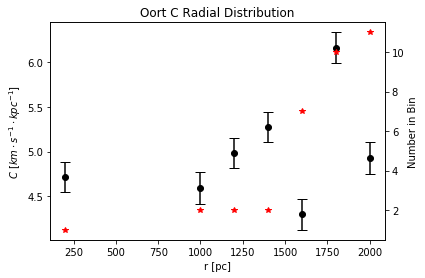

In [28]:
fig, ax1 = plt.subplots()

ax1.errorbar(r, np.array([i[3][0][0] for i in modes]),yerr=np.array([abs(i[3][0][0]-i[3][0][1]) for i in modes]).T, color='k',fmt='o', capsize=5)
ax1.set_xlabel('r [pc]')

ax1.set_ylabel('$C \ [km \cdot s^{-1} \cdot kpc^{-1}]$', color='k')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.plot(r, np.array([i[1] for i in n]), 'r*')
ax2.set_ylabel('Number in Bin', color='k')
ax2.tick_params('y', colors='k')

plt.title('Oort C Radial Distribution')
plt.savefig(fn+'_radial_C.png',dpi=300);

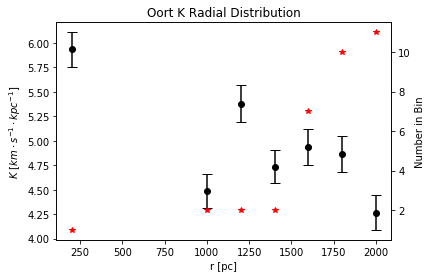

In [29]:
fig, ax1 = plt.subplots()

ax1.errorbar(r, np.array([i[4][0][0] for i in modes]),yerr=np.array([abs(i[4][0][0]-i[4][0][1]) for i in modes]).T, color='k',fmt='o', capsize=5)
ax1.set_xlabel('r [pc]')

ax1.set_ylabel('$K \ [km \cdot s^{-1} \cdot kpc^{-1}]$', color='k')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ax2.plot(r, np.array([i[1] for i in n]), 'r*')
ax2.set_ylabel('Number in Bin', color='k')
ax2.tick_params('y', colors='k')

plt.title('Oort K Radial Distribution')
plt.savefig(fn+'_radial_K.png',dpi=300);